# Assignment 7.1 
## Regex Software and Services
## Implement Linear Regression from Scratch 


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression - Implementation from scratch
## Steps:
- **Create a Class: specify parameters which will be used in Linear Regression.**
- **Create Function for:**
    - **Gradient descent**
    - **Fit_transform**
    - **Predict**

In [66]:
class Linear_Regression():    
    def __init__(self, learning_rate, iterations):                    # Constructor Function. 
        self.learning_rate = learning_rate                            # Initializing the Learning rate. 
        self.iterations = iterations                                  # Initializing the Iterations.

    def gradient_descent(self):                                       # Function for updating weights. 
        Y_pred = self.predict(self.features)
        
        # calculate gradients
        
        grad_w = -( 2 * (self.features.T).dot(self.target - Y_pred )) / self.rows
        grad_b = - 2 * np.sum(self.target - Y_pred ) / self.rows

        self.W = self.W - self.learning_rate * grad_w                  # Updating Weights. 
        self.b = self.b - self.learning_rate * grad_b                  # Updating Weights. 
        return self


    def fit_transform(self , features , target):
        self.features = features
        self.target = target
        self.rows, self.cols = features.shape[0], features.shape[1]
        self.W = np.zeros(self.cols)
        self.b = 0
        costs = []
        for i in range(self.iterations) :
            self.gradient_descent()
        return self
    
    def predict(self,features):
        return features.dot(self.W)+ self.b

In [74]:
df = pd.read_csv('Salary_Data-Copy1.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [75]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)


In [77]:
lin_reg = Linear_Regression(learning_rate = 0.001, iterations=1000)
model = lin_reg.fit_transform(X_train, y_train)

In [78]:
Y_pred = model.predict( X_test )
print( "Predicted values ", np.round( Y_pred[:3], 2 ) ) 
print( "Real values      ", y_test[:3])
print( "Trained W        ", round(model.W[0],2))
print( "Trained b        ", round(model.b, 2))

Predicted values  [ 28851.59 134333.41  60016.68]
Real values       [ 37731. 122391.  57081.]
Trained W         11986.57
Trained b         10871.74


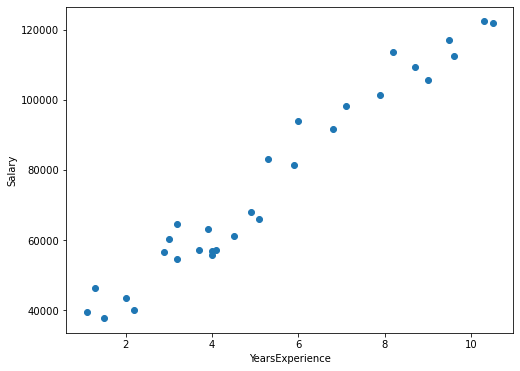

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()



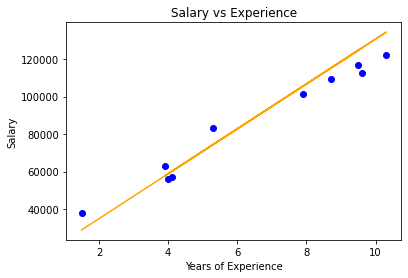

In [80]:
plt.scatter( X_test, y_test, color = 'blue' )
plt.plot( X_test, Y_pred, color = 'orange' )
plt.title( 'Salary vs Experience' )
plt.xlabel( 'Years of Experience' )
plt.ylabel( 'Salary' )
plt.show()

